In [1]:
import os
import sys
import numpy             as np
import pylab             as pl
import astropy.units     as u
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [2]:
sys.path.append('{}/DESI/'.format(os.environ['HOME']))

In [4]:
import pubplot

from   ros_tools import roscen

ImportError: cannot import name 'roscen' from 'ros_tools' (/cosma/home/durham/dc-wils7/DESI/ros_tools.py)

In [4]:
user = os.environ['USER']

gama = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold.fits'.format(user))
gama

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64
622826,588848900966843153,135.29128973,0.73684492,19.52932,0.19599,4,G09_Y4_250_046,5,22.020153,20.377008,19.499466,19.005283,18.786238,675.6378214236531,39.148569764410766,G9,-401.4507325397739,397.38942226883273,7.264870993114358,398.1057165460414,-400.7474548163634,6.865700983452657
98018,587722984422572189,175.80676776,1.03979445,17.181564,0.12235,5,318751477415831552,6,20.014534,18.041721,17.051146,16.660717,16.285437,401.92205472701687,38.020709189748985,G12,-357.0901766741274,26.18065690719771,6.498521489182441,356.8640071382125,-29.17917108743816,6.140703437324076
179539,587725041167958197,185.28082311,-2.01676876,17.398222,0.11987,5,375074516243605504,6,19.144875,18.023605,17.372164,17.003819,16.770828,393.10363399643376,37.97253529309312,G12,-349.3197250762236,-32.287491353971,-12.35330763647876,349.56604377802995,29.35218373424349,-12.703817624256102
123400,587724649255272757,175.90640607,-2.63469103,19.703936,0.20353,4,G12_Y5_031_129,5,21.896381,20.65739,19.737505,19.25727,18.919243,704.9226238685321,39.240707245445364,G12,-583.6007189978711,41.76743430129024,-26.923935422192173,583.2020090701326,-46.66801123639224,-27.508715443730114
21792,588848901520687262,174.11934361,1.19125843,19.769054,0.09367,4,G12_Y2_041_191,5,21.340754,20.277332,19.741936,19.477285,19.246664,301.5876132374549,37.39706750142148,G12,-274.2469435183071,28.247090786472544,5.732964615651035,274.0056131993049,-30.549676680565064,5.458226846049943
568279,588848899390898422,214.45970835,-0.58545657,17.96164,0.14758,4,G15_Y1_CS2_160,6,19.828785,18.751087,18.050817,17.663683,17.445728,493.1394545447609,38.46484875231907,G15,-354.297063504097,-243.1349660834733,-4.390876917291383,356.3222351156781,240.15041225312072,-4.748157217736273
584067,588848899911778530,177.92700457,-0.04394753,19.499855,0.16294,3,G12_Y1_CND1_387,5,22.6881,20.946205,19.895058,19.585438,19.362041,549.9946219409453,38.70179221408222,G12,-472.624990377859,17.107319010063307,-0.3627545939243074,472.4640202314034,-21.076606982027975,-0.8364862126678851
177060,587725041163632853,175.44139669,-2.00218956,19.053614,0.10619,4,G12_Y4_205_334,6,20.445747,19.495165,19.025667,18.72989,18.483276,344.9424683031418,37.68873333359824,G12,-310.6530986437244,24.76866545016479,-10.894595730923317,310.4230111307792,-27.37717355405658,-11.205856948990599


In [5]:
desi = Table.read('{}/data/GAMA4/desi_gold.fits'.format(os.environ['HOME']))
desi

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GAMA_FIELD,RMAG_DRED,GOOD_Z,IN_GOLD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GAMA_SEP,GOOD_MATCH,ZDESI
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,arcsec,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bytes3,float32,bool,bool,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64
39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,1.7268775719768001,G12,17.080044,True,True,185088,587725041702076597,179.03857839,-1.63308943,17.340437,0.08715,5,371706163328215040,6,19.55327,17.981966,17.22529,16.837662,16.547691,279.4580234303819,37.23158291510796,-256.9031208508893,4.311231969110904,-7.325469940185463,211.045909774929,-146.5834001931734,-6.662843908063725,0.03700738404518863,True,0.08720044682704724
39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786m015,0.023079034,31.97689,22.125416,2.4041193,0.5788827,4.046993,11.168232,21.348835,4.046993,11.168232,21.348835,1.0,0.31920266,0.0,0.0,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.55969144029038,-1.3892300444133558,1,306.1762,1,1,0.001,0.001,0.001,0.001,178.559695421442,0.0,-1.389233925725511,0.0,0.778823,1,1.735508547828506,G12,19.338854,True,

In [7]:
desi_gama = Table.read('{}/data/GAMA4/desi_gama.fits'.format(os.environ['HOME']))
desi_gama

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GAMA_FIELD,RMAG_DRED,GOOD_Z,IN_GOLD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GAMA_SEP,GOOD_MATCH
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,arcsec,
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bytes3,float32,bool,bool,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,0.08720044682704724,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,1.7268775719768001,G12,17.080044,True,True,185088,587725041702076597,179.03857839,-1.63308943,17.340437,0.08715,5,371706163328215040,6,19.55327,17.981966,17.22529,16.837662,16.547691,279.2861975876171,37.23024736630215,-256.75708194725576,4.308781210287915,-7.321305710513508,256.70436181560433,-6.465302621376652,-7.578702379172695,0.03700738404518863,True
39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,0.16695365525817663,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786m015,0.023079034,31.97689,22.125416,2.4041193,0.5788827,4.046993,11.168232,21.348835,4.046993,11.168232,21.348835,1.0,0.31920266,0.0,0.0,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.55969144029038,-1.3892300444133558,1,306.1762,1,1,0.001,0.001,0.001,0.001,178.559695421442,0.0,-1.389233925725511,0.0,0.778823,1,1.735508547828506,

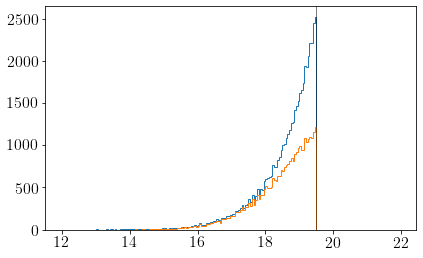

In [8]:
_ = pl.hist(desi_gama['RMAG_DRED'], histtype='step', bins=np.arange(12., 22., 0.05))
_ = pl.hist(desi['RMAG_DRED'],      histtype='step', bins=np.arange(12., 22., 0.05))

pl.axvline(19.5, c='k', lw=0.5)

Text(0, 0.5, 'N')

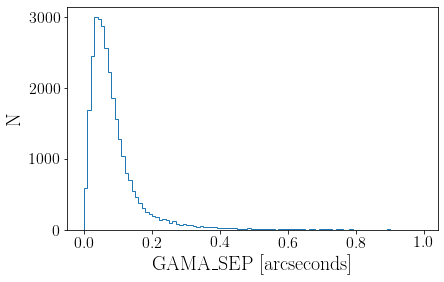

In [9]:
plt.hist(desi['GAMA_SEP'].data, histtype='step', bins=np.arange(0., 1., 1.e-2))

plt.xlabel('GAMA_SEP [arcseconds]')
plt.ylabel('N')

In [10]:
good_match = desi['GAMA_SEP'].data < .6

print('Good match fraction: {:.4f}[%]'.format(100. * np.mean(good_match)))

Good match fraction: 90.3649[%]


In [11]:
100. * np.mean(desi['GAMA_FIELD'].data == b'NAN')

6.9452906055806025

In [12]:
no_match = desi[~good_match]
match    = desi[ good_match]
match

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GAMA_FIELD,RMAG_DRED,GOOD_Z,IN_GOLD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GAMA_SEP,GOOD_MATCH,ZDESI
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,arcsec,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bytes3,float32,bool,bool,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64
39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,1.7268775719768001,G12,17.080044,True,True,185088,587725041702076597,179.03857839,-1.63308943,17.340437,0.08715,5,371706163328215040,6,19.55327,17.981966,17.22529,16.837662,16.547691,279.4580234303819,37.23158291510796,-256.9031208508893,4.311231969110904,-7.325469940185463,211.045909774929,-146.5834001931734,-6.662843908063725,0.03700738404518863,True,0.08720044682704724
39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786m015,0.023079034,31.97689,22.125416,2.4041193,0.5788827,4.046993,11.168232,21.348835,4.046993,11.168232,21.348835,1.0,0.31920266,0.0,0.0,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.55969144029038,-1.3892300444133558,1,306.1762,1,1,0.001,0.001,0.001,0.001,178.559695421442,0.0,-1.389233925725511,0.0,0.778823,1,1.735508547828506,G12,19.338854,True,

Text(0, 0.5, 'Declination [deg.]')

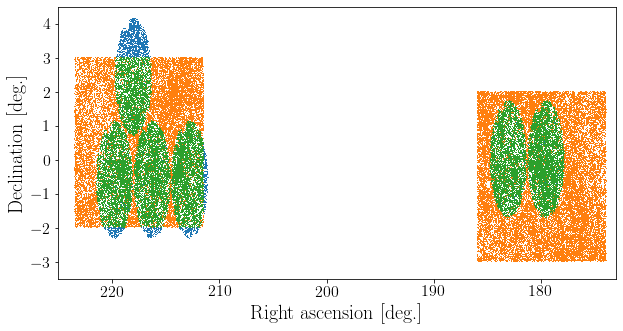

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

pl.plot(desi['TARGET_RA'],   desi['TARGET_DEC'], marker=',', lw=0.0)
pl.plot(gama['RA'],   gama['DEC'], marker=',', lw=0.0)
pl.plot(match['TARGET_RA'], match['TARGET_DEC'], marker=',', lw=0.0)

pl.xlim(225., 173.)
pl.ylim(-3.5,  4.5)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

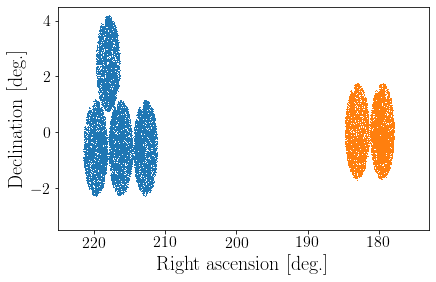

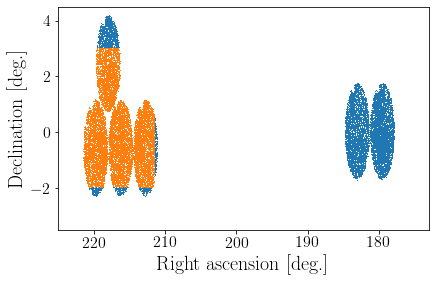

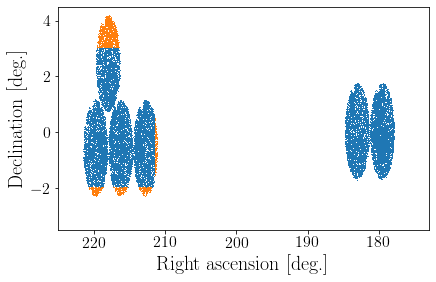

In [36]:
for field in np.unique(desi['GAMA_FIELD'].data):
    pl.plot(desi['TARGET_RA'], desi['TARGET_DEC'], marker=',', lw=0.0)
    pl.plot(desi['TARGET_RA'][desi['GAMA_FIELD'].data == field], desi['TARGET_DEC'][desi['GAMA_FIELD'].data == field], marker=',', lw=0.0)

    pl.xlim(225., 173.)
    pl.ylim(-3.5,  4.5)

    pl.xlabel('Right ascension [deg.]')
    pl.ylabel('Declination [deg.]')
    
    pl.show()

In [15]:
100. * len(no_match) / len(desi), 100. * np.count_nonzero(no_match['GAMA_FIELD'] == b'NAN') / len(desi)

(9.635067625198001, 6.945290605580602)

In [16]:
no_match = no_match[no_match['GAMA_FIELD'] != b'NAN']
no_match

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GAMA_FIELD,RMAG_DRED,GOOD_Z,IN_GOLD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GAMA_SEP,GOOD_MATCH,ZDESI
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,arcsec,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bytes3,float32,bool,bool,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64
39627751489012980,8736.21676492691,776.7664538911582 .. -8.061740968395892,5.399940122889987e-06,0,7919,GALAXY,--,10,1670.2557117938995,0,178.80102417267298,-1.4268060770775728,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.985942606933922,575,9010,322443,1268,SER,11.727854,17.699108,22.258057,163.28955,81.457054,16.802336,0,0,--,0.0,0.0,0.0,0.0,1788m015,0.02546514,14.878554,5.01466,2.0774882,0.45524412,1.539735,2.3236933,2.9222322,1.5397358,2.3236952,2.9222348,0.5236543,2.2283788,0.2143134,-0.26564842,S,102100,9,5764607523034234880,131074,0,131072,0,0,0,178.80102417267298,-1.4268060770775728,2,912.8835,2,1,0.0055,0.0065192026,-0.0115,0.01430035,178.80104390679838,0.044652227,-1.4267637777762823,0.11282692,0.7021714,1,1.6352388176075028,G12,19.32499,True,True,144095,587724650867130690,178.80110253,-1.42699825,19.415764,0.13355,4,G12_Y2_026_219,5,20.644794,19.76827,19.383938,19.166662,18.93593,441.5747270344027,38.2250210457118,-389.3921574951403,8.14910666755454,-9.702259864274422,318.98256386472417,-223.52005559458615,-8.70073571335162,0.7470888717972285,False,0.133410456483349
39627757545591891,8936.934342354536,1202.4033838894127 .. 9.353745611047382,5.1771655121327246e-05,0,7922,GALAXY,--,10,1267.6229182947427,0,179.98914003117494,-1.3672142239000142,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.12873837344001315,516,9010,323887,5203,SER,13.285279,45.843437,90.2849,205.09554,92.950325,19.318233,0,3602450823642088192,G2,19.863712,19.448198,17.798765,0.0,1798m012,0.028576912,103.152885,73.05049,1.5569417,0.4308143,6.3176417,21.80025,42.933804,6.318216,21.80241,42.938286,3.5092316,0.7876447,0.49745032,-0.26540035,S,102100,9,1152921504606846976,131074,0,0,0,0,0,179.98914003117494,-1.3672142239000142,1,341.1487,1,1,0.0,0.0,-0.001,0.001,179.9891400761394,0.0,-1.3672104589358902,0.0,0.7592387,1,1.421504820470863,G12,18.284939,True,True,

Text(0, 0.5, 'Declination [deg.]')

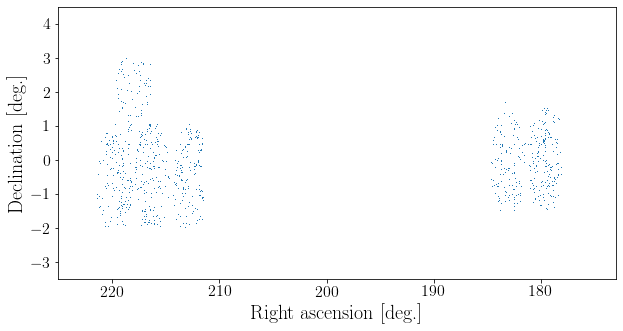

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

pl.plot(no_match['TARGET_RA'], no_match['TARGET_DEC'], marker=',', lw=0.0)

pl.xlim(225., 173.)
pl.ylim(-3.5,  4.5)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

In [22]:
100. * len(no_match) / len(desi)

2.6897770196173996

In [18]:
# sorted(desi.dtype.names)

In [23]:
def zcomp(match, xcol='ZDESI', ycol='ZGAMA', xlabel=r'$z_{\rm DESI}$', ylabel=r'$z_{\rm GAMA}$'):
    fig, ax = plt.subplots(2, 1,\
                           figsize=(5, 8),\
                           sharex=True,\
                           gridspec_kw = {'height_ratios': [2, 1],\
                                          'hspace':0.05})

    ax[0].scatter(match[xcol], match[ycol], s=0.15)

    ax[0].axes.get_xaxis().set_visible(False)
    
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    ax[0].set_xlim(-0.05, 0.3)
    ax[0].set_ylim(-0.05, 0.3)

    ax[1].scatter(match[xcol], (match[ycol] - match[xcol]) / (1. + match[xcol]), s=0.15)
    
    ax[1].set_xlim(-0.0, 0.3)
    ax[1].set_ylim(-0.003, 0.003)
    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(r'$\Delta z \ / \ (1 + z_{\rm DESI}) $')

    ax[1].axhline(y = 0.001, color = 'k', linewidth=.5)
    ax[1].axhline(y = -0.001, color = 'k', linewidth=.5)

    ax[0].legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


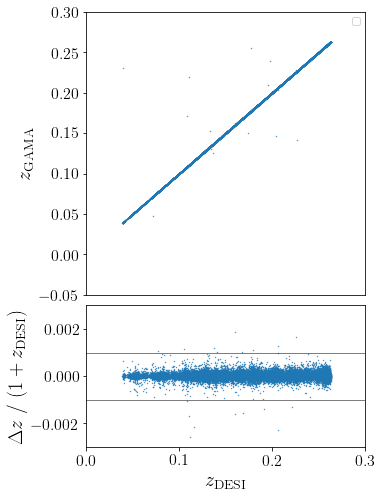

In [24]:
zcomp(match)

In [23]:
thres    = 1000. # km/s

z_ratio  = np.abs(match['ZGAMA'] - match['ZDESI']) / (1. + match['ZGAMA'])
cat_frac = np.mean(z_ratio > (thres / 2.9979e5))

print('For {} km/s, catastrophic failures are: {:.4f} [%]'.format(thres, 100. * cat_frac))

For 1000.0 km/s, catastrophic failures are: 0.0405 [%]


# GAMA - DESI

In [54]:
gama_desi = Table.read('{}/data/GAMA4/gama_desi.fits'.format(os.environ['HOME']))
gama_desi

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,GAMA_FIELD,DESI_SEP,GOOD_MATCH
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,float64,bool
622826,588848900966843153,135.29128973,0.73684492,19.52932,0.19599,4,G09_Y4_250_046,5,22.020153,20.377008,19.499466,19.005283,18.786238,675.6378214236531,39.148569764410766,G9,-401.4507325397739,397.38942226883273,7.264870993114358,398.1057165460414,-400.7474548163634,6.865700983452657,39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,44.313563775417826,True,0.08720044682704724,G12,153297.4630034124,False
98018,587722984422572189,175.80676776,1.03979445,17.181564,0.12235,5,318751477415831552,6,20.014534,18.041721,17.051146,16.660717,16.285437,401.92205472701687,38.020709189748985,G12,-357.0901766741274,26.18065690719771,6.498521489182441,356.8640071382125,-29.17917108743816,6.140703437324076,39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786m015,0.023079034,31.97689,22.125416,2.4041193,0.5788827,4.046993,11.168232,21.348835,4.046993,11.1

In [55]:
sorted(gama_desi.dtype.names)

['BGS_TARGET',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CATAID',
 'CHI2',
 'COADD_EXPTIME',
 'COADD_FIBERSTATUS',
 'COADD_NUMEXP',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE',
 'COEFF',
 'DEC',
 'DELTACHI2',
 'DESI_SEP',
 'DESI_TARGET',
 'DISTMOD',
 'EBV',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FIELD',
 'FLUX_G',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_Z',
 'FLUX_R',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_Z',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAMA_FIELD',
 'GMAG_DRED_SDSS',
 'GOOD_MATCH',
 'GOOD_Z',
 'IMAG_DRED_SDSS',
 'LUMDIST',
 'MASKBITS',
 'MEAN_DELTA_X',
 'MEAN_DELTA_Y',
 'MEAN_FIBER_DEC',
 'MEAN_FIBER_RA',
 'MEAN_PSF_TO_FIBER_SPECFLUX',
 'MORPHTYPE',
 'MWS_TARGET',
 'NCOEFF',
 'NPIXELS',
 'NQ',
 'NUMOBS_INIT',
 'OBJID',
 'OBJTYPE',
 'OBSCONDITIONS',
 'PARALLAX',
 'PHOTSYS

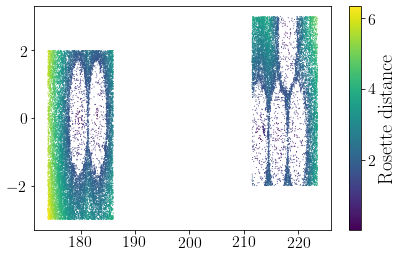

In [60]:
isin = (~gama_desi['GOOD_MATCH'].data) & (gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['RA'] > 170.) 

pl.scatter(gama_desi['RA'][isin], gama_desi['DEC'][isin], c=gama_desi['ROS_DIST'][isin], marker='.', lw=0.0, s=4)
pl.colorbar(label='Rosette distance')

Text(0, 0.5, 'Declination [deg.]')

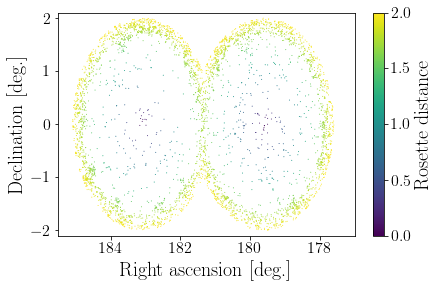

In [87]:
no_match = (~gama_desi['GOOD_MATCH'].data) & (gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < 2.0) 
no_match =   gama_desi[no_match]

pl.scatter(no_match['RA'], no_match['DEC'], c=no_match['ROS_DIST'], marker='.', lw=0.0, s=4, vmin=0.0, vmax=2.0)
pl.colorbar(label='Rosette distance')

pl.xlim(185.5, 177.)
pl.ylim(-2.1,   2.1)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

In [ ]:
for rosn in np.unique(no_match):
    isin = no_match['ROS'] == rosn
    
    pl.scatter(no_match['RA'][isin], no_match['DEC'], c=no_match['ROS_DIST'], marker='.', lw=0.0, s=4, vmin=0.0, vmax=2.0)
    pl.colorbar(label='Rosette distance')

    pl.xlim(185.5, 177.)
    pl.ylim(-2.1,   2.1)

    pl.xlabel('Right ascension [deg.]')
    pl.ylabel('Declination [deg.]')

(0.0, 35.0)

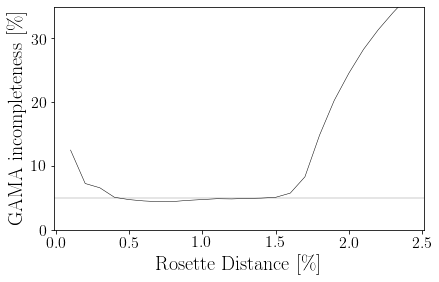

In [83]:
rads   = np.arange(0.1, 2.5, 0.1)
result = []

for level in np.arange(5.0, 6.0, 1.):
    pl.axhline(level, c='k', lw=0.2)

for rad in rads:
    # https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent
    ntargets  = np.count_nonzero((gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < rad))
    n_nomatch = np.count_nonzero((gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < rad) & (~gama_desi['GOOD_MATCH'].data)) 

    result.append(100. * n_nomatch / ntargets)
    
result = np.array(result)

pl.plot(rads, result, c='k', lw=0.5)

pl.xlabel('Rosette Distance [\%]')
pl.ylabel('GAMA incompleteness [\%]')

pl.ylim(0.0, 35.0)

# DESI SV3 Gold

In [84]:
desi_sv3 = Table.read('{}/data/GAMA4/desi_sv3_gold.fits'.format(os.environ['HOME']))
desi_sv3

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,GAMA_FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,LUMDIST,DISTMOD,RMAG_DRED,IN_GOLD
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,float64,float64,float64,float64,float64,float64,float64,float64,float32,bool
39633166985594086,8161.966528326273,431.54444110266667 .. 0.37436575275004985,1.5949780393114214e-05,0,7926,GALAXY,--,10,691.3415319025517,0,245.95428861898907,45.110617535314425,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.7450889382379872,516,9011,565022,1254,SER,12.762528,27.279205,48.365807,88.751724,46.159653,18.345007,0,0,--,0.0,0.0,0.0,0.0,2460p450,0.0074150483,48.3229,35.17903,3.379117,1.207703,2.9170544,6.235044,11.054682,2.9170544,6.235044,11.054682,0.61969316,1.6813492,-0.40741447,0.14170305,N,102100,9,1152921504606846976,514,0,0,0,0,0,245.95428861898907,45.110617535314425,4,2670.7947,2,1,-0.00075,0.003968627,0.0,0.0017320508,245.95428441609783,0.11145355,45.11061755278615,0.022525022,0.7297878,13,1.6614687926952203,True,0.19225187007353295,NAN,-159.47880253445373,-357.4275390593515,392.90650277481814,363.2244043646719,211.30483129504606,361.9140152078768,661.2038551868037,39.10167688542774,18.894367,True
39633166985594263,9487.479449011385,11.778540737206658 .. 28.903713267879542,3.7003942799268754e-05,0,7921,GALAXY,--,10,162.0550653114915,0,245.96595252669218,45.09575017209191,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.5414673071765063,516,9011,565022,1431,SER,5.620103,17.415108,41.365597,94.712456,44.780445,17.260471,0,0,--,0.0,0.0,0.0,0.0,2460p450,0.007530189,90.10934,80.74812,2.290763,0.8514775,1.4784573,4.581321,10.881878,1.4798447,4.5829268,10.881932,2.6836996,2.3807688,-0.15365115,-0.75679773,N,102100,9,1152921504606846976,514,0,0,0,0,0,245.96595252669218,45.09575017209191,2,1357.1959,2,1,0.0,0.005,-0.009,0.009055385,245.96595267145904,0.1429104,45.09578313105753,0.013018471,0.7163139,13,1.6469002067184357,True,0.19810591431732485,NAN,-164.09875606696482,-367.9831844608404,404.26333597304637,373.8544344458411,217.59442575628074,372.3632612459198,683.8329184909115,39.17475001560831,19.381382,True
39633166985594300,8840.833384888712,445.6807665481852 .. -13.597592900360423,0.000198017108481484,0,7925,GALAXY,--,10,335.724442104809,0,245.96843547144243,45.09214401847235,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.2949408331841764,516,9011,565022,1468,DEV,4.221143,19.593254,43.107624,151.95273,62.037014,26.96179,0,0,--,0.0,0

Text(0, 0.5, 'Declination [deg.]')

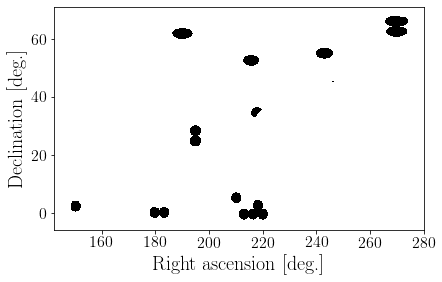

In [86]:
pl.plot(desi_sv3['TARGET_RA'], desi_sv3['TARGET_DEC'], marker=',', lw=0.0, c='k')

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

# Done.